# CSCA 5632 Mini Project: BBC News Classification

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF


In [3]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# please, no warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=ConvergenceWarning)
os.environ['PYTHONWARNINGS']='ignore'

## Exploratory Data Analysis (EDA)

In [6]:
df_train = pd.read_csv('./data/news/BBC News Train.csv')
df_test = pd.read_csv('./data/news/BBC News Test.csv')

### Data inspection

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


Train dataset has 1490 data points with article ID, article text and category labels. Test dataset has 735 entries with article ID and article text, but no labels. Both train and test data have only non-null values, so we do not need to drop any entries based on null values.

### Drop Duplicates

Although we did not have to drop any null values, we should still check for duplicates in train data.

In [19]:
df_train = df_train.drop_duplicates(subset=['Text'])
df_train

ArticleId                                               Text  \
0          1833  worldcom ex-boss launches defence lawyers defe...   
1           154  german business confidence slides german busin...   
2          1101  bbc poll indicates economic gloom citizens in ...   
3          1976  lifestyle  governs mobile choice  faster  bett...   
4           917  enron bosses in $168m payout eighteen former e...   
...         ...                                                ...   
1485        857  double eviction from big brother model caprice...   
1486        325  dj double act revamp chart show dj duo jk and ...   
1487       1590  weak dollar hits reuters revenues at media gro...   
1488       1587  apple ipod family expands market apple has exp...   
1489        538  santy worm makes unwelcome visit thousands of ...   

           Category  
0          business  
1          business  
2          business  
3              tech  
4          business  
...             ...  
1485  entertainment  
1486  entertainment  
1487       business  
1488           tech  
1489           tech  

[1440 rows x 3 columns]

After dropping duplicates, we are left with 1440 entries (50 dropped).

### Check Class Imbalance

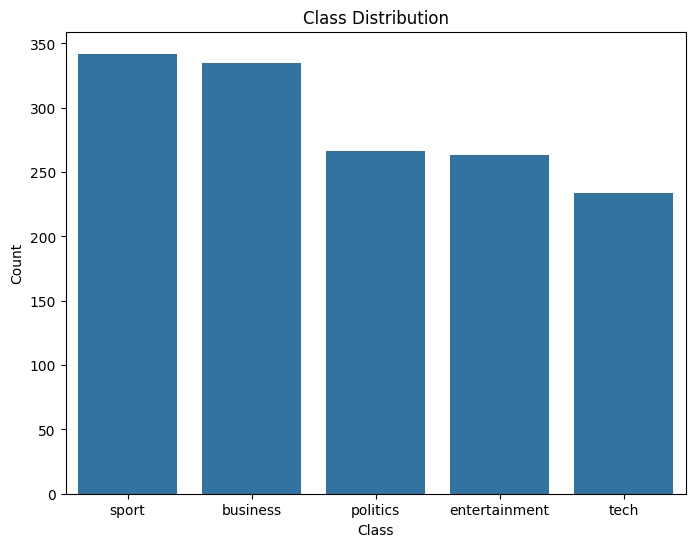

In [20]:
class_counts = df_train['Category'].value_counts()

# bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

There is a slight imbalance in labels towards sports and business articles, but it seems each label has decent representation.

### Text Cleaning

Next, we must perform preprocessing specific to the texts. Below is an example of an unprocessed text.

In [22]:
df_train.iloc[0]['Text']

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

Some low hanging fruits in cleaning the texts involve ensuring that they are all in lower case and stripping away punctuations, but I found an exhaustive list of text cleaning in a related Kaggle Notebook [[1](#[1]-https://www.kaggle.com/code/jieshends2020/matrix-factorization-97-acc-with-1-labels/notebook)], some of which we will consider.


Finally, the last preprocessing step involves removing stop words. Surprisingly, yet also obviously in hindsight, the most frequent words in a body of text do not necessarily provide the most value in interpretability. For example, the definite and indefinite articles "the" and "a/an" are most frequently used in writing, but they provide minimal context clues for determining the topic of a writing. 

## References

##### [1] https://www.kaggle.com/code/jieshends2020/matrix-factorization-97-acc-with-1-labels/notebook
##### [2] https://www.kaggle.com/code/dazhengzhu/bbc-news-classification
##### [3] https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html